# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

### Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


### Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


### Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [1]:
# Upgrading scipy if its version is below 1.6.1

import scipy
scipy.__version__

# This line should remain commented if the version is 1.6.1 or above
#!pip install --upgrade scipy

'1.7.3'

In [2]:
# Importing numerical and data manipulation libraries
import numpy as np
import pandas as pd

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ensuring the requested graphs are shown
%matplotlib inline  

# Importing statistical libraries
import scipy.stats as stats
import statsmodels.stats.proportion as proportion
import statsmodels.stats.multicomp as multicomp

# Mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

# Setting the background theme and font scale for figures
sns.set_theme(style = 'darkgrid', font_scale = 1.1)

# to restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Reading the Data into a DataFrame & Peeking the First/Last Few Rows

In [3]:
# reading the datasset
data_orig = pd.read_csv('/content/drive/MyDrive/Python_files/abtest.csv')

# ensuring the original dataset remains unchanged
df = data_orig.copy()

# peeking the first five rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
# peeking the last five rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Observations: 
The dataset has 6 columns, and seemingly 100 rows. Data in each row corresponds to a single user ID randomly drawn for statistical tests. As expected, there are two groups of them, 'treatment' and 'control', corresponding to new and old pages, respectively. The time spent on the website, the language preferred by the user and whether the user has been converted to subscribe have been reported as well. We'll look into each colum in further detail in what follows.

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [5]:
# Checking the shape of the dataset
print('The dataset has', df.shape[0], 'rows and', df.shape[1], 'columns.')

The dataset has 100 rows and 6 columns.


In [6]:
# General info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:
As discussed previously, there are six columns of data. Info method shows no null value for any of the columns, and it seems all entries have been properly filled. We'll further check this later. Except 'user_id', which is not a variable to be statistically analyzed, the only numerical variable is 'time_spent_on_the_page'. The other four columns are categorical (object) types.  

In [7]:
# Statistical summary of the dataset (categorical variables)
df.describe(include = object).T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


In [8]:
# Statistical summary of the dataset (numerical variables)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.00,546517.00,52.30,546443.00,546467.75,546492.50,546567.25,546592.00
time_spent_on_the_page,100.00,5.38,2.38,0.19,3.88,5.42,7.02,10.71


#### Observations:

Categorical:

*   There are two groups of users: control and treatment, and since the frequency of control is 50, we can conclude that the users are equally split between the two groups.
*   As anticipated, there are two sets of landing pages: old and new, with identical frequency. We note that there is a one-to-one correspondence between old/new pages and control/treatment groups. 
*   There are two types of entries for 'converted' column: yes and no. The majority of the users (54) have been convinced to subscribe.
*   There are three types of languages, with Spanish being the most reocurring one. We'll later see that in fact, Spanish has the same frequency as French.

Numerical:

*   There are 100 user IDs, but the max - min > 99, i.e., not all IDs between the minimum and maximum have been selected, somewhat evidencing the randomness. 
* The time spent on the website lies in the fairly wide range of 0.19 min. to 10.71 mins. Note that the max and min are two orders of magnitude different. The average falls somewhere in between (5.38 mins.), which is very close to the median time (5.42 mins.). The standard deviation $s =  $ 2.38 mins. is expectedly and noticeably large (nearly 50% of the mean).     




In [9]:
# Checking for missing and duplicated entries

print('Dataset has', df.isnull().sum().sum(), 'missing entries.')
print('Dataset has', df.duplicated().sum(), 'duplicated rows.')

Dataset has 0 missing entries.
Dataset has 0 duplicated rows.


#### Observations:

The dataset has NO missing values or duplicated rows.

In [10]:
# Checking the correspondence between the landing page and user group

print('Number of users in the control group visiting the new page:', 
      df.loc[(df['landing_page'] == 'new') & (df['group'] == 'control')].shape[0])
print('Number of users in the treatment group visiting the old page:', 
      df.loc[(df['landing_page'] == 'old') & (df['group'] == 'treatment')].shape[0])

Number of users in the control group visiting the new page: 0
Number of users in the treatment group visiting the old page: 0


#### Observations:
This shows that the old page fully corresponds to the control group, and the new page completely overlaps with the treatment group. These 'group' and 'landing_page' columns can thus be used interchangeably.

### Renaming the Columns:
For convenience, we rename a couple of columns with inconveniently long names.

In [11]:
# Renaming columns with long names
df.rename(columns = {'language_preferred': 'language', 'time_spent_on_the_page': 'spent_time'}, inplace = True)

# Ensuring the changes have been applied 
df.head()

,user_id,group,landing_page,spent_time,converted,language
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


### Univariate Analysis

#### User ID:

In [12]:
# Exploring User IDs:

print('# of unique user IDs:', df['user_id'].nunique())
print('Minimum order ID:', df['user_id'].min())
print('Maximum order ID:', df['user_id'].max())
print('Difference between the maximum and minimum:', df['user_id'].max() - df['user_id'].min())

# of unique user IDs: 100
Minimum order ID: 546443
Maximum order ID: 546592
Difference between the maximum and minimum: 149


#### Observations:
Although there are 100 unique IDs, they haven't been selected from 100 back to back numbers, which is expected, since the users chosen for the study are selected via simple random sampling.

#### Study Group:

control      50
treatment    50
Name: group, dtype: int64


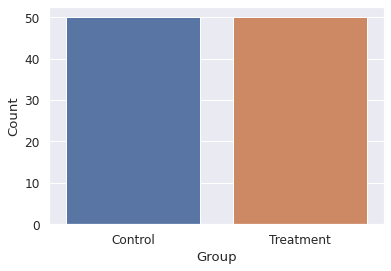

In [13]:
# Exploring study groups

print(df['group'].value_counts())
plt.figure(figsize = (6, 4))
cntplt = sns.countplot(data = df, x = 'group');
cntplt.set_xticklabels(['Control', 'Treatment']);
plt.xlabel('Group');
plt.ylabel('Count');

#### Observations:
As noted before, the users chosen for this study have been equally divided into two groups of control and treatment, each with 50 members.  

#### Landing Pages:

old    50
new    50
Name: landing_page, dtype: int64


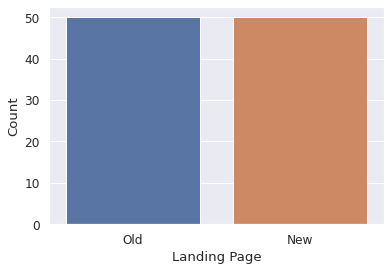

In [14]:
# Exploring landing pages

print(df['landing_page'].value_counts())
plt.figure(figsize = (6, 4))
cntplt = sns.countplot(data = df, x = 'landing_page');
cntplt.set_xticklabels(['Old', 'New']);
plt.xlabel('Landing Page');
plt.ylabel('Count');

#### Observations:
As noted before, there is a one-to-one correspondence between the control/treatment groups and the old/new landing pages, so not surprisingly, landing pages are also split equally into two groups of old and new, each with 50 entries.

#### Conversion:

yes    54
no     46
Name: converted, dtype: int64


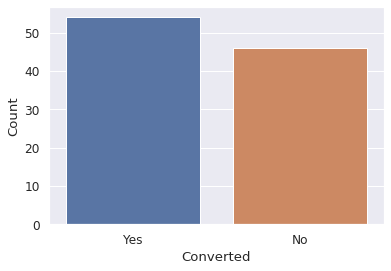

In [15]:
# Exploring conversion of a user into a subscriber

print(df['converted'].value_counts())
plt.figure(figsize = (6, 4))
cntplt = sns.countplot(data = df, x = 'converted', order = ['yes', 'no']);
cntplt.set_xticklabels(['Yes', 'No']);
plt.xlabel('Converted');
plt.ylabel('Count');

#### Observations:
The majority of studied users (54 of them to be exact) have been convinced to subscribe, or, equivalently, have been converted. 

#### Preferred Languages:

Spanish    34
French     34
English    32
Name: language, dtype: int64


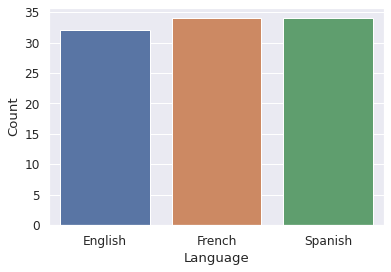

In [16]:
# Exploring language preferences of users

print(df['language'].value_counts())
plt.figure(figsize = (6, 4))
sns.countplot(data = df, x = 'language', order = ['English', 'French', 'Spanish']);
plt.xlabel('Language');
plt.ylabel('Count');

#### Observations:
All three categories of language have been nearly equally represented in the sample, with Spanish and French being slightly more frequent than English.

#### Time Spent on the Landing Pages:

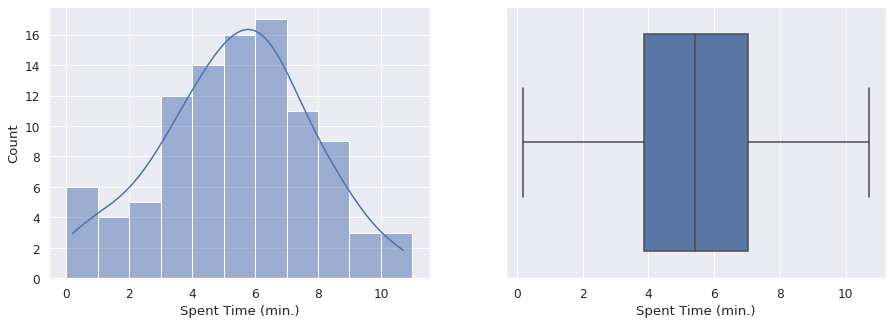

In [17]:
# Exploring the time spent on the pages by users

# Histogram
plt.figure(figsize = (15, 5))
plt.subplot(121)
sns.histplot(data = df, x = 'spent_time', bins = 11, binrange = (0, 11), kde = True);
plt.xlabel('Spent Time (min.)');
plt.ylabel('Count');

# Boxplot
plt.subplot(122)
sns.boxplot(data = df, x = 'spent_time');
plt.xlabel('Spent Time (min.)');


#### Observations:


*   The distribution of the time spent on the websites is fairly (but not exactly) normal, and it's not skewed to any certain direction.
*   The box plot corroborates this observation by showing that the median resides almost in the middle (5.42 min.), the two whiskers have nearly the same length, and the time spent on the pages has no outliers.



### Bivariate Analysis

We first investigate the impact of all categorical variebles on the time spent on the webpages. We then repeat the same procedure but this time after separating users into two groups (control and treatment), and study each individually. Recall that 'landing_page' and 'group' basically show the same thing, so studying one of them is enough.

#### Spent Time vs. Landing Page

The average time spent by users on each landing page (min.):


landing_page
new   6.22
old   4.53
Name: spent_time, dtype: float64

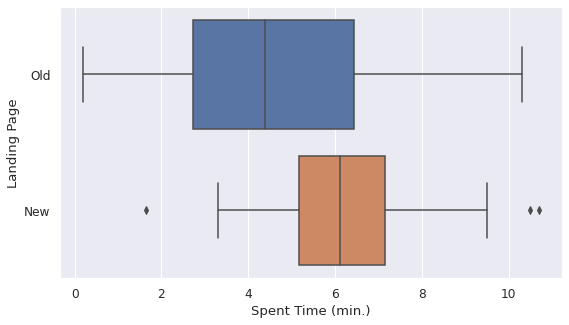

In [18]:
# Comparing the effect of old/new webpages on the time spent on them by users 

plt.figure(figsize = (9, 5));
bxplt = sns.boxplot(data = df, x = 'spent_time', y = 'landing_page');
plt.xlabel('Spent Time (min.)');
plt.ylabel('Landing Page');
bxplt.set_yticklabels(['Old', 'New']);

print('The average time spent by users on each landing page (min.):')
df.groupby('landing_page')['spent_time'].mean()

#### Spent Time vs. Conversion Status

The average time spent on the webpages categorized by the conversion status of users (min.):


converted
no    3.92
yes   6.62
Name: spent_time, dtype: float64

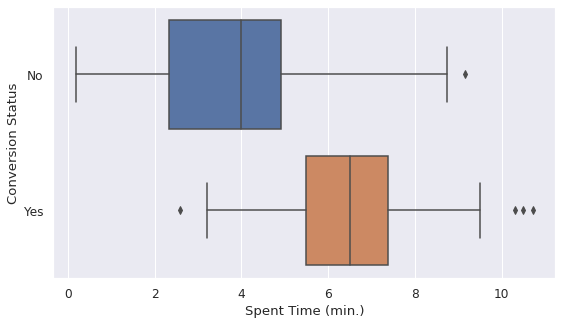

In [19]:
# Exploring how the time spent by users on the websites relates to their conversion status 

plt.figure(figsize = (9, 5));
bxplt = sns.boxplot(data = df, x = 'spent_time', y = 'converted');
plt.xlabel('Spent Time (min.)');
plt.ylabel('Conversion Status');
bxplt.set_yticklabels(['No', 'Yes']);

print('The average time spent on the webpages categorized by the conversion status of users (min.):')
df.groupby('converted')['spent_time'].mean()

#### Spent Time vs. Language

The average time spent on the webpages categorized by the preferred language of users (min.):


language
English   5.56
French    5.25
Spanish   5.33
Name: spent_time, dtype: float64

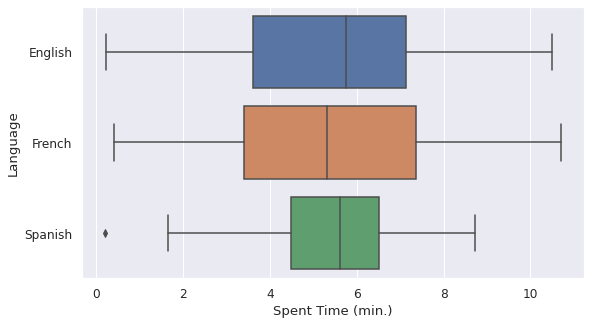

In [20]:
# Exploring the impact of the preferred language on the time spent by users

plt.figure(figsize = (9, 5));
bxplt = sns.boxplot(data = df, x = 'spent_time', y = 'language', order = ['English', 'French', 'Spanish']);
plt.xlabel('Spent Time (min.)');
plt.ylabel('Language');

print('The average time spent on the webpages categorized by the preferred language of users (min.):')
df.groupby('language')['spent_time'].mean()

#### Observations:

*   Seemingly, the new webpage is far more successful in attracting people, as the (mean and median) time spent by the users on the new landing page is noticeably higher than the old one. 
*   As anticipated, and as evidenced by the much higher mean and median values of spent time for converted users, those who spend more time on the website are likelier to end up subscribing. 
*   The language doesn't appear to have any substantial impact on the time spent on the websites by users. English and French have higher maxima compared to Spanish, but the mean and median of neither group stand out. 
*   Note that all these conclusions are rudimentary, and are based on EDA. More concrete conclusions will be drawn after carrying out the relevant statistical tests.




#### Spent Time vs. Conversion Status (control and treatment separated)

The average time spent on the webpages categorized by the preferred language of users (min.):


group      converted
control    no          3.35
           yes         6.17
treatment  no          4.88
           yes         6.91
Name: spent_time, dtype: float64

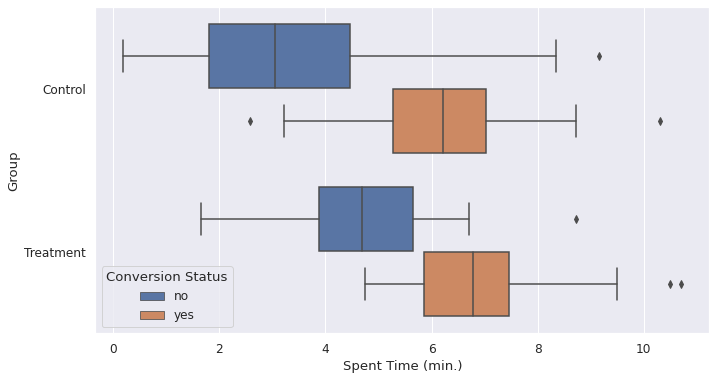

In [21]:
# Exploring how the time spent on websites influences users' subscription status 
# Note that here control and treatment groups are studied separately

plt.figure(figsize = (11, 6));
bxplt = sns.boxplot(data = df, x = 'spent_time', y = 'group', hue = 'converted');
plt.xlabel('Spent Time (min.)');
plt.ylabel('Group');
bxplt.set_yticklabels(['Control', 'Treatment']);
plt.legend(loc = 'lower left', title = 'Conversion Status')

print('The average time spent on the webpages categorized by the preferred language of users (min.):')
df.groupby(['group', 'converted'])['spent_time'].mean()


#### Spent Time vs. Language (control and treatment separated)

The average time spent on the webpages categorized by the preferred language of users (min.):


group      language
control    English    4.45
           French     4.31
           Spanish    4.83
treatment  English    6.66
           French     6.20
           Spanish    5.84
Name: spent_time, dtype: float64

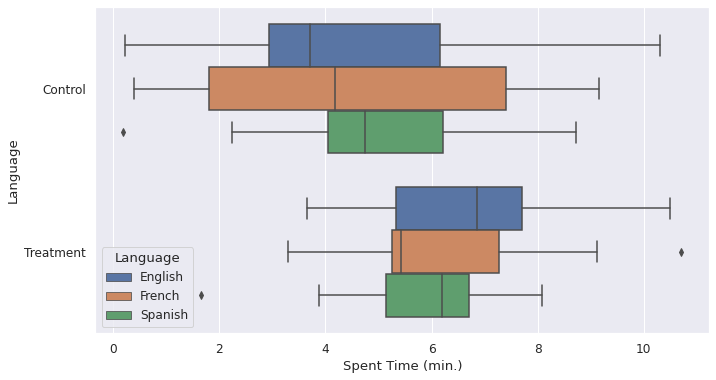

In [22]:
# Exploring how the language chosen by users impacts the time they spend on the websites 
# Note that here control and treatment groups are studied separately

plt.figure(figsize = (11, 6));
bxplt = sns.boxplot(data = df, x = 'spent_time', y = 'group', hue = 'language', hue_order = ['English', 'French', 'Spanish']);
plt.xlabel('Spent Time (min.)');
plt.ylabel('Language');
plt.legend(loc = 'lower left', title = 'Language')
bxplt.set_yticklabels(['Control', 'Treatment']);

print('The average time spent on the webpages categorized by the preferred language of users (min.):')
df.groupby(['group', 'language'])['spent_time'].mean()


#### Observations:


*   We can confirm again that those converted to subscribe spend more time on the websites. This difference is smaller in the treatment group (the group that visits the new landing page).
*   We can also infer again that those in the treatment group (those who're shown the new page) spend more time on the website than the control group. Within each group, the time spent on the webpage is not affected too much by the language. In the control group, English has a somewhat lower median, but a mean close to the mean of the other two languages. For the treatment group, French has a fairly smaller median than the other two, but its mean is not too different.   
*   We again emphasize that these EDA-based conclusions aren't concrete and need to be supported by rigorous statistical testings.  



## 1. Do the users spend more time on the new landing page than the existing landing page?

In [23]:
# Setting the level of sigificance for all statistical tests

alpha = 0.05  # significance level

### Perform visual analysis

We repeat the visualization performed in the bivariate analysis section for the impact of the landing page on the time spent on the websites, here, with slightly more details.

The average time spent by users on each landing page (min.):


landing_page
new   6.22
old   4.53
Name: spent_time, dtype: float64

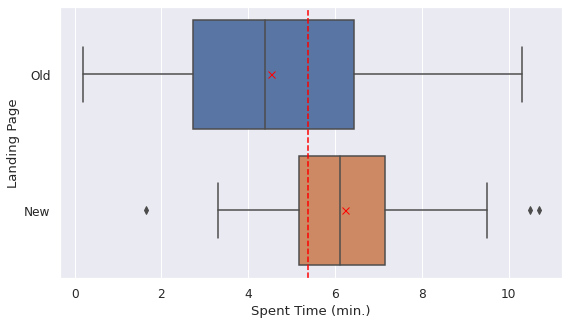

In [24]:
# Comparing the effect of old/new webpages on the time spent on them users 

plt.figure(figsize = (9, 5));
bxplt = sns.boxplot(data = df, x = 'spent_time', y = 'landing_page', showmeans = True,
                    meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Spent Time (min.)');
plt.ylabel('Landing Page');
bxplt.set_yticklabels(['Old', 'New']);
plt.axvline(df.groupby('landing_page')['spent_time'].mean().values.mean(), linestyle = '--', color = 'red')

print('The average time spent by users on each landing page (min.):')
df.groupby('landing_page')['spent_time'].mean()

#### Observations:
As can be seen, the new page has been visited longer on average, but this has yet to be confirmed by the proper statistical test. The red crosses demonstrate the corresponding mean value of each boxplot, while the vertical, dashed line passes through the average of these means, to better indicate how different or close they are.

### Step 1: Define the null and alternative hypotheses

$H_0$: $\mu_n = \mu_o$

$H_a$: $\mu_n > \mu_o$

Here, $\mu_n$ and $\mu_o$ indicate the average time spent on the new and old landing pages, respectively.

### Step 2: Select appropriate test

Since we're comparing the average of two distinct samples drawn from two independent populations, whose standard deviations aren't provided to us, the ***one-tailed, two-sample (independent) t-test*** appear to be the most appropriate statistical test. 

### Step 3: Decide the significance level

As set already, and as provided by the problem statement, the level of significance will be fixed at $\alpha = 0.05$ for all tests.

### Step 4: Collect and prepare data

In [25]:
# Subsetting the dataset based on the landing page

# A dataset of all users visiting the old page
df_o = df.loc[df['landing_page'] == 'old'].reset_index(drop = True)
# A dataset of all users visiting the new page
df_n = df.loc[df['landing_page'] == 'new'].reset_index(drop = True)

# Ensuring the subsets have been made properly
print(df_o.head(), end = '\n'*2)
print(df_n.head())


   user_id    group landing_page  spent_time converted language
0   546592  control          old        3.48        no  Spanish
1   546567  control          old        3.02        no   French
2   546558  control          old        5.28       yes  English
3   546581  control          old        6.53       yes  Spanish
4   546548  control          old        2.08        no  English

   user_id      group landing_page  spent_time converted language
0   546468  treatment          new        7.13       yes  English
1   546462  treatment          new        4.40        no  Spanish
2   546459  treatment          new        4.75       yes  Spanish
3   546448  treatment          new        5.25       yes   French
4   546461  treatment          new       10.71       yes   French


### Step 4.5: Checking the standard deviations/variances

Before proceeding any further, the (in)equality of standard deviations or, equivalently, variances of the two groups should be examined, as it determines one of the parameters of the test.

Note that for this test the null and alternative hypotheses are:

$H_0$ = $\sigma_n^2 = \sigma_o^2$

$H_a$ = $\sigma_n^2 \neq \sigma_o^2$

Here, $\sigma_n$ and $\sigma_p$ are the respective standard deviations for the time spent by the users on the new and old landing pages.



In [26]:
# Checking the standard deviations of the two groups

sd_o = df_o['spent_time'].std(ddof = 1)
sd_n = df_n['spent_time'].std(ddof = 1)

print('The standard deviation of the time spent by the users visiting the old page:', round(sd_o, 2), 'mins.')
print('The standard deviation of the time spent by the users visiting the new page:', round(sd_n, 2), 'mins.')

The standard deviation of the time spent by the users visiting the old page: 2.58 mins.
The standard deviation of the time spent by the users visiting the new page: 1.82 mins.


#### Notes:

*   Setting delta degrees of freedom equal to one might be wiser, since we work with samples not the whole populations.
*   The standard deviations look somewhat different, but to be more certain, we'd conduct an F-test for comparison of variances.

In [27]:
# Developing my own function for comparing variances

def my_vareq_test(x, y):
  '''This function receives two vectors and based on F-test calculations,
  ensures whether their variances are equal or not.'''

  x = np.array(x)
  y = np.array(y)

  n_x = len(x)   # sample sizes
  n_y = len(y)

  dfn = n_x - 1  # dof of numerator and denominator
  dfd = n_y - 1

  s_x = np.std(x, ddof = 1)  # sample standard deviations
  s_y = np.std(y, ddof = 1)

  test_stat = s_x**2/s_y**2   # test statistic

  if(test_stat < 1):
    test_stat = 1/test_stat
    dfn = n_y - 1 
    dfd = n_x - 1

  p_val = 2*(1 - stats.f.cdf(test_stat, dfn, dfd))
  return test_stat, p_val

# Conducting F-test for equality of variances using my in-house function
test_stat, p_value = my_vareq_test(df_o['spent_time'], df_n['spent_time'])

print('Test Statistic =', round(test_stat, 3))
print('p-value =', round(p_value, 3))
if(p_value < alpha):
  print('There is enough statistical evidence to reject the equality of variances. \n' +
        'The variances of the two samples are thus assumed to be NOT equal.')
else:
  print('There is NOT enough statistical evidence to reject the equality of variances. \n' + 
        'The variances of the two samples are thus assumed to be equal.')

Test Statistic = 2.019
p-value = 0.015
There is enough statistical evidence to reject the equality of variances. 
The variances of the two samples are thus assumed to be NOT equal.


### Step 5: Calculate the p-value

We're now ready to perform the one-tailed, two-sample, independent t-test, while setting the equal_var parameter false.

In [28]:
# Conducting two-sample t-test

test_stat, p_value = stats.ttest_ind(df_n['spent_time'], df_o['spent_time'], equal_var = False, alternative = 'greater')

print('Test Statistic =', round(test_stat, 3))
print('p-value =', round(p_value, 6))

Test Statistic = 3.787
p-value = 0.000139


### Step 6: Compare the p-value with $\alpha$

In [29]:
if(p_value < alpha):
  print('There is enough statistical evidence to reject the equality of means of the two populations. \n' +
        'The average time users spend on the new page is GREATER than that of the old page.')
else:
  print('There is NOT enough statistical evidence to reject the equality of means of the two populations. \n' +
        'The difference between the time spent by users on the two webpages is NOT statistically significant.')

There is enough statistical evidence to reject the equality of means of the two populations. 
The average time users spend on the new page is GREATER than that of the old page.


### Step 7:  Draw inference

Since p-value is much smaller than the significance level, the null hypothesis (equality of means of the time spent on the new and old pages by the users) is rejected. Thus, there is enough statistical evidence to assert that, on average, users spend more time on the new page than the old one. We can claim it with more than 95% confidence. Note that we carried out a one-tailed test to examine the research question (alternative hypothesis) of $\mu_n > \mu_o$.   

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform visual analysis

In [30]:
# Making a crosstab out of landing page and conversion status
ctab = pd.crosstab(df['landing_page'], df['converted'], normalize = 'index')
# converting the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'values'}, inplace = True)

# displaying the original crosstab and its dataframe equivalent
print(ctab, end = '\n'*2)
print(ctab_df)

converted      no  yes
landing_page          
new          0.34 0.66
old          0.58 0.42

  landing_page converted  values
0          new        no    0.34
1          new       yes    0.66
2          old        no    0.58
3          old       yes    0.42


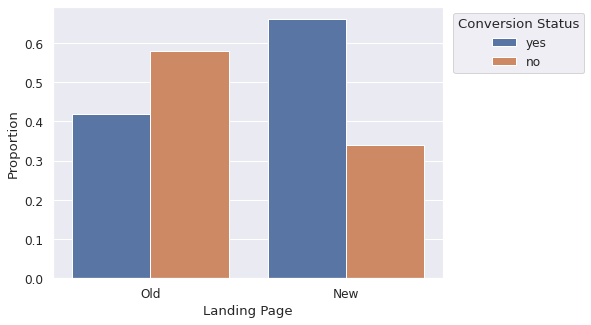


Conversion rate for the old page: 0.42
Conversion rate for the new page: 0.66


In [31]:
# Plotting the crosstab

plt.figure(figsize = (7, 5))
ctabplt = sns.barplot(data = ctab_df, x = 'landing_page', y = 'values', hue = 'converted',
                      order = ['old', 'new'], hue_order = ['yes', 'no']);
ctabplt.set_xticklabels(['Old', 'New']);
plt.xticks(rotation = 0);
plt.xlabel('Landing Page');
plt.ylabel('Proportion')
plt.legend(title = 'Conversion Status', bbox_to_anchor = [1.01, 1]);
plt.show()

# Number of users visiting each page
old_page_num = df.loc[df['landing_page'] == 'old'].shape[0]
new_page_num = df.loc[df['landing_page'] == 'new'].shape[0]
# Number of converted users for each page
old_page_conv_num = df.loc[(df['landing_page'] == 'old') & (df['converted'] == 'yes')].shape[0]
new_page_conv_num = df.loc[(df['landing_page'] == 'new') & (df['converted'] == 'yes')].shape[0]

# Printing the conversion rate of users for each group
print('\nConversion rate for the old page:', round(old_page_conv_num/old_page_num, 2))
print('Conversion rate for the new page:', round(new_page_conv_num/new_page_num, 2))

#### Observations:

As can be noted, the conversion rate for the users visiting the new page is arithmetically much (24%) larger than that of the users visiting the old page. This, however, should be substantiated by the poper statistical test.

### Step 1: Define the null and alternative hypotheses

$H_0$: $p_{n} = p_{o}$

$H_a$: $p_{n} > p_{o}$

Here, $p_{n}$ and $p_{o}$ (calculated as the ratio of converted users to all users in each group) denote the conversion rates among users visiting the new and old landing pages, respectively.


### Step 2: Select appropriate test

Since we're comparing the proportions of converted users to all users for two separate samples drawn from two independent populations, and the research quesion concerns one being greater than the other, the ***one-tailed, two-sample z-test for proportions*** appear to be the most appropriate statistical test. 

### Step 3: Decide the significance level

As set already, and as provided by the problem statement, the level of significance will be fixed at $\alpha = 0.05$ for all tests.

### Step 4: Collect and prepare data

Here, we just repeat the calculations in the visualization section, where we found the numbers of people visiting each page and the number of converted users within each. We then check for the primary assumption of z-test for proportions that $np > 10$ and $n(1 - p) > 10$ for each group, where $n$ and $p$ represent the sample size and the proportion, respectively.

In [32]:
# Number of users visiting each page
n_o = df.loc[df['landing_page'] == 'old'].shape[0]
n_n = df.loc[df['landing_page'] == 'new'].shape[0]
# Number of converted users for each page
n_co = df.loc[(df['landing_page'] == 'old') & (df['converted'] == 'yes')].shape[0]
n_cn = df.loc[(df['landing_page'] == 'new') & (df['converted'] == 'yes')].shape[0]

# Conversion rate or the proportion of converted users to all for both pages
p_o = n_co/n_o   
p_n = n_cn/n_n 

# Checking the assumptions of z-test for proportions
assumptions = 0
if(n_o*p_o and n_o*(1-p_o)):
  print('Sample of users visiting the old page satisfies the assumptions of the z-test for proportions.')
  assumptions += 1
else:
  print('Sample of users visiting the old page does NOT satisfy the assumptions of the z-test for proportions.')

if(n_n*p_n and n_n*(1-p_n)):
  print('Sample of users visiting the new page satisfies the assumptions of the z-test for proportions.')
  assumptions += 1
else:
  print('Sample of users visiting the new page does NOT satisfy the assumptions of the z-test for proportions')  

if(assumptions == 2):
  print('Both samples meet the assumptions of the statistical test.')
elif(assumptions == 1):
  print('Only one of the samples meets the assumptions of the statistical test.')
else:
  print('None of the samples meets the assumptions of the statistical test.')
  

Sample of users visiting the old page satisfies the assumptions of the z-test for proportions.
Sample of users visiting the new page satisfies the assumptions of the z-test for proportions.
Both samples meet the assumptions of the statistical test.


### Step 5: Calculate the p-value

Now that we're convinced with the satisfaction of the assumptions, we can proceed to carrying out the two-sample z-test for proportions.


In [33]:
# Conducting two-sample z-test for proportions

test_stat, p_value = proportion.proportions_ztest(count = np.array([n_cn, n_co]), nobs = np.array([n_n, n_o]), alternative = 'larger')

print('Test Statistic =', round(test_stat, 3))
print('p-value =', round(p_value, 5))

Test Statistic = 2.408
p-value = 0.00803


### Step 6: Compare the p-value with $\alpha$

In [34]:
print('Test Statistic =', round(test_stat, 3))
print('p-value =', round(p_value, 3))

if(p_value < alpha):
  print('There is enough statistical evidence to reject the equality of proportions of converted users for the two populations. \n' +
        'The conversion rate among users visiting the new page is GREATER than those visiting the old page.')
else:
  print('There is NOT enough statistical evidence to reject the equality of proportions of converted users for the two populations. \n' +
        'The difference between the conversion rates of the two populations is NOT statistically significant.')

Test Statistic = 2.408
p-value = 0.008
There is enough statistical evidence to reject the equality of proportions of converted users for the two populations. 
The conversion rate among users visiting the new page is GREATER than those visiting the old page.


### Step 7:  Draw inference

Since p-value is much smaller than the significance level, the null hypothesis (equality of proportions of converted users between the treatment and control groups) is rejected. Thus, there is enough statistical evidence to assert with more than 95% confidence that a larger proportion of users who visit the new page get converted, or, equivalently, users visiting the new page are likelier to subscribe. Note that we conducted a one-tailed test to examine the research question (alternative hypothesis) of $p_n > p_o$. 

## 3. Is the conversion and preferred language are independent or related?

### Perform visual analysis

In [35]:
# Making a crosstab out of landing page and conversion status
ctab = pd.crosstab(df['language'], df['converted'], normalize = 'index')
# converting the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'values'}, inplace = True)

# displaying the original crosstab and its dataframe equivalence
print(ctab, end = '\n'*2)
print(ctab_df)

converted   no  yes
language           
English   0.34 0.66
French    0.56 0.44
Spanish   0.47 0.53

  language converted  values
0  English        no    0.34
1  English       yes    0.66
2   French        no    0.56
3   French       yes    0.44
4  Spanish        no    0.47
5  Spanish       yes    0.53


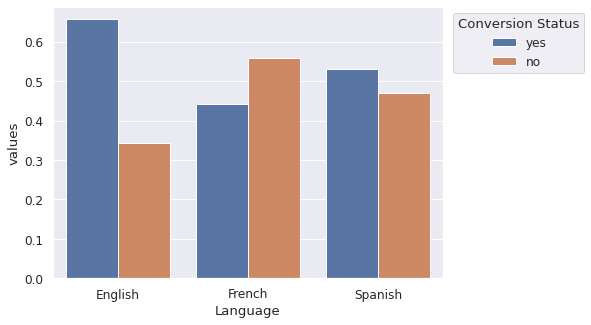


Conversion rate for English speakers: 0.66
Conversion rate for French speakers: 0.44
Conversion rate for Spanish speakers: 0.53


In [36]:
# Plotting the crosstab

plt.figure(figsize = (7, 5))
ctabplt = sns.barplot(data = ctab_df, x = 'language', y = 'values', hue = 'converted', 
            order = ['English', 'French', 'Spanish'], hue_order = ['yes', 'no']);
ctabplt.set_xticklabels(['English', 'French', 'Spanish']);
plt.xticks(rotation = 0);
plt.xlabel('Language');
plt.legend(title = 'Conversion Status', bbox_to_anchor = [1.01, 1]);
plt.show()

# Number of users speaking each of three languages
English_num = df.loc[df['language'] == 'English'].shape[0]
French_num = df.loc[df['language'] == 'French'].shape[0]
Spanish_num = df.loc[df['language'] == 'Spanish'].shape[0]
# Number of converted users for in each language category
English_conv_num = df.loc[(df['language'] == 'English') & (df['converted'] == 'yes')].shape[0]
French_conv_num = df.loc[(df['language'] == 'French') & (df['converted'] == 'yes')].shape[0]
Spanish_conv_num = df.loc[(df['language'] == 'Spanish') & (df['converted'] == 'yes')].shape[0]

# Printing the conversion rate of users for each group
print('\nConversion rate for English speakers:', round(English_conv_num/English_num, 2))
print('Conversion rate for French speakers:', round(French_conv_num/French_num, 2))
print('Conversion rate for Spanish speakers:', round(Spanish_conv_num/Spanish_num, 2))


#### Observations:

Arithmetically speaking, users with different preferred languages have noticeably different conversion rates, with English speakers having the highest conversion rate. This can imply that preferred language and conversion status are related. The concrete statistical examination of this claim is presented in the next steps of this question.

### Step 1: Define the null and alternative hypotheses

$H_0$: Preferred language and conversion status of users are independent.

$H_a$: Preferred language and conversion status of users are dependent.

### Step 2: Select appropriate test

Here, the dependence of two categorical variables is the subject of inquiry. Therefore, the ***chi-square test of independence*** is the way to go.

### Step 3: Decide the significance level

As set already, and as provided by the problem statement, the level of significance will be fixed at $\alpha = 0.05$ for all tests.

### Step 4: Collect and prepare data

In [37]:
# Building a dataframe of languages and fraction of their speakers who subscribe

# Creating a list of languages
languages = sorted(df['language'].unique())

# Initiating the dataframe
language_conversion_df = pd.DataFrame({'Language': languages})

for i, text in enumerate(languages):
  # Number of users of a certain language group 
  n_lang = df.loc[df['language'] == text].shape[0]
  # Number of converted users of a certain language group 
  n_lang_conv = df.loc[(df['language'] == text) & (df['converted'] == 'yes')].shape[0]
  language_conversion_df.loc[i, 'Converted (No.)'] = n_lang_conv
  language_conversion_df.loc[i, 'Not Converted (No.)'] = n_lang - n_lang_conv

language_conversion_df['Converted (No.)'] = language_conversion_df['Converted (No.)'].astype(int)
language_conversion_df['Not Converted (No.)'] = language_conversion_df['Not Converted (No.)'].astype(int)

# Displaying the completed dataframe
language_conversion_df

,Language,Converted (No.),Not Converted (No.)
0,English,21,11
1,French,15,19
2,Spanish,18,16


### Step 5: Calculate the p-value


In [38]:
# Conducting chi-square test of independence on the numerical columns of language_conversion_df

chi, p_value, dof, expected = stats.chi2_contingency(language_conversion_df.drop('Language', axis = 1))
print('p-value =', round(p_value, 3))

p-value = 0.213


### Step 6: Compare the p-value with $\alpha$

In [39]:
if(p_value < alpha):
  print('There is enough statistical evidence to reject the null hypothesis that language and conversion status are independent. \n' +
        'The preferred language of users and their conversion status largely depend on each other.')
else:
  print('There is NOT enough statistical evidence to reject the the null hypothesis that language and conversion status are independent. \n' +
        'The preferred language of users and their conversion status appear to be (to some degree) independent of each other.')

There is NOT enough statistical evidence to reject the the null hypothesis that language and conversion status are independent. 
The preferred language of users and their conversion status appear to be (to some degree) independent of each other.


### Step 7:  Draw inference

Since p-value is greater than the significance level, the null hypothesis (independence of users' preferred language and conversion status) CANNOT be rejected. Thus, there is NOT enough statistical evidence to reject (with more than 95% confidence) the assertion that the language preferred by the users and their conversion status are independent. However the conversion rates of various languages are noticeably different, perhaps since the sample sizes of each subgroup (language category) isn't large enough, the dependence of language and conversion status CANNOT be claimed with more than 95% confidence (only with ~ 80% confidence).

## 4. Is the time spent on the new page same for the different language users?

### Perform visual analysis

We repeat the visualization performed in the bivariate analysis section for the impact of the preferred languages on the time spent on the webpages, here, with slightly more details.

The average time spent by users on new webpage categorized by thier preferred languages (min.):


language
English   6.66
French    6.20
Spanish   5.84
Name: spent_time, dtype: float64

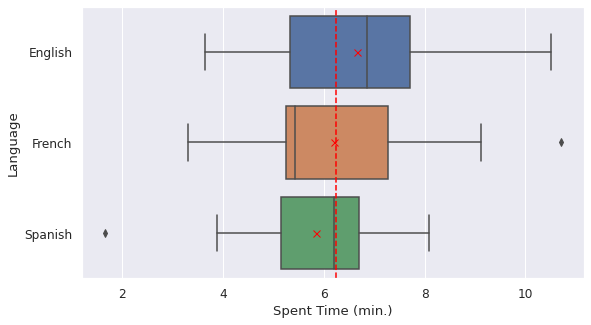

In [40]:
# Comparing the effect of the preferred languages on the time spent on the new webpage 

# Making a dataset only containing the users visiting the new pages
df_new = df.loc[df['landing_page'] == 'new'].reset_index(drop = True)

plt.figure(figsize = (9, 5));
bxplt = sns.boxplot(data = df_new, x = 'spent_time', y = 'language', showmeans = True, order = ['English', 'French', 'Spanish'],
                    meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Spent Time (min.)');
plt.ylabel('Language');
plt.axvline(df_new.groupby('language')['spent_time'].mean().values.mean(), linestyle = '--', color = 'red')

print('The average time spent by users on new webpage categorized by thier preferred languages (min.):')
df_new.groupby('language')['spent_time'].mean()

#### Observations:
As can be seen, the choice of language doesn't influence the time users spend on the new webpage substantially. This, however, should be rigorously demonstrated via appropriate statistical tests. The red crosses show the corresponding mean of each language group, while the vertical, dashed line passes through the average of these means, to better visualize the closeness of the means to each other.

### Step 1: Define the null and alternative hypotheses

$H_0$: $\mu_{en} = \mu_{fr} = \mu_{sp}$

$H_a$: For at least one pair, the means aren't equal.

Here, $\mu_{en}$, $\mu_{fr}$ and $\mu_{sp}$ represent the average time spent on the new wepage by users who've selected English, French and Spanish as their preferred language, respectively.

### Step 2: Select appropriate test

Since we're comparing the average of three (more than two) distinct samples drawn fron three independent populations, the ***one-way ANOVA (Analysis of Variance) test*** is chosen to conduct the hypothesis testing. The two main assumptions of this test, namely, the normality of the distribution and the homogenity (equality) of variances of all groups will be examined as well.

### Step 3: Decide the significance level

As set already, and as provided by the problem statement, the level of significance will be fixed at $\alpha = 0.05$ for all tests.

### Step 4: Select appropriate test

In [41]:
# Subsetting the dataset based on the landing page

# A dataset of all English speakers
df_en = df_new.loc[df_new['language'] == 'English'].reset_index(drop = True)
# A dataset of all French speakers
df_fr = df_new.loc[df_new['language'] == 'French'].reset_index(drop = True)
# A dataset of all Spanish speakers
df_sp = df_new.loc[df_new['language'] == 'Spanish'].reset_index(drop = True)

# Ensuring subsets have been made properly
print(df_en.head(3), end = '\n'*2)
print(df_fr.head(3), end = '\n'*2)
print(df_sp.head(3))

   user_id      group landing_page  spent_time converted language
0   546468  treatment          new        7.13       yes  English
1   546443  treatment          new        8.73        no  English
2   546450  treatment          new        3.65        no  English

   user_id      group landing_page  spent_time converted language
0   546448  treatment          new        5.25       yes   French
1   546461  treatment          new       10.71       yes   French
2   546478  treatment          new        6.03       yes   French

   user_id      group landing_page  spent_time converted language
0   546462  treatment          new        4.40        no  Spanish
1   546459  treatment          new        4.75       yes  Spanish
2   546491  treatment          new        5.86       yes  Spanish


### Step 4.5: Checking the principal assumptions of ANOVA test

In this step, we determine whether the assumptions of the ANOVA test are fulfilled or not.

The ***Shapiro-Wilk's test*** helps examine whether a continuous variable follows a normal distribution or not. The null and alternative hypotheses of this test for the time spent by users on webpages are

$H_0$: Time spent by users on the webpages has a normal distribution.

$H_a$: Time spent by users on the webpages does NOT have a normal distribution.

We run this test for the full dataset, and the datasets subsetted by the preferred language.

In [42]:
# Shapiro-Wilk's test for ensuring the data is normally distributed

stat, p_val = stats.shapiro(df_new['spent_time'])
stat, p_val_en = stats.shapiro(df_en['spent_time'])
stat, p_val_fr = stats.shapiro(df_fr['spent_time'])
stat, p_val_sp = stats.shapiro(df_sp['spent_time'])

print('p-value for Shapiro\'s test performed on the time spent on the new page:', round(p_val, 3))
print('p-value for Shapiro\'s test performed on the time spent on the new page by English-speaking users:', round(p_val_en, 3))
print('p-value for Shapiro\'s test performed on the time spent on the new page by French-speaking users:', round(p_val_fr, 3))
print('p-value for Shapiro\'s test performed on the time spent on the new page by Spanish-speaking users:', round(p_val_sp, 3))

p-value for Shapiro's test performed on the time spent on the new page: 0.804
p-value for Shapiro's test performed on the time spent on the new page by English-speaking users: 0.886
p-value for Shapiro's test performed on the time spent on the new page by French-speaking users: 0.321
p-value for Shapiro's test performed on the time spent on the new page by Spanish-speaking users: 0.09


#### Observations:

Since p-value for all tests is $\geq \alpha = 0.05$, although barely for the last one, we fail to reject the null hypothesis of any of these tests, i.e., the 'spent time' variable of 'df_new' as well as the 'spent time' variable of the datasets subsetted based on the preferred language from this set all (to some good degree) have normal distributions.

We use the ***Levene's test*** to examine the homogenity of variances of the subsetted groups. The null and alternative hypotheses of this test for this certain problem are

$H_0$: $\sigma^2_{en} = \sigma^2_{fr} = \sigma^2_{sp}$

$H_a$: For at least one pair, variances aren't equal.

Here, $\sigma^2_{en}$, $\sigma^2_{fr}$ and $\sigma^2_{sp}$ denote the variances of the time spent on webpages for users who choose English, French and Spanish as their preferred langauge, respectively.

In [43]:
# Levene's test for ensuring that the variances of all subgroups are identical

stat, p_val = stats.levene(df_en['spent_time'], df_fr['spent_time'], df_sp['spent_time'])

print('Standard deviation of the time spent on webpages by English-speaking users (min.):', round(df_en['spent_time'].std(ddof = 1), 2))
print('Standard deviation of the time spent on webpages by French-speaking users (min.):', round(df_fr['spent_time'].std(ddof = 1), 2))
print('Standard deviation of the time spent on webpages by Spanish-speaking users (min.):', round(df_sp['spent_time'].std(ddof = 1), 2))
print('p-value for Levene\'s test performed on the spent time of different language groups:', round(p_val, 3))

Standard deviation of the time spent on webpages by English-speaking users (min.): 1.98
Standard deviation of the time spent on webpages by French-speaking users (min.): 1.93
Standard deviation of the time spent on webpages by Spanish-speaking users (min.): 1.53
p-value for Levene's test performed on the spent time of different language groups: 0.467


#### Observations:

Since p-value $\geq \alpha = 0.05$, we fail to reject the null hypothesis of the Levene's test, i.e., the variances of the time spent by users on the new webpage for all language groups can to some extent be assumed equal.

### Step 5: Calculate the p-value



In [44]:
# Carrying out the ANOVA test

test_stat, p_val = stats.f_oneway(df_en['spent_time'], df_fr['spent_time'], df_sp['spent_time'])

print('Test Statistic =', round(test_stat, 3))
print('p-value =', round(p_val, 3))

Test Statistic = 0.854
p-value = 0.432


### Step 6: Compare the p-value with $\alpha$


In [45]:
if(p_value < alpha):
  print('There is enough statistical evidence to reject the null hypothesis. \n' +
        'We can thus infer that the mean time spent by users on the new webpage varies with their preferred language.')
else:
  print('There is NOT enough statistical evidence to reject the the null hypothesis. \n' +
        'We thus CANNOT claim that the mean time spent by users on the new webpage varies statistically significantly with their preferred language.')

There is NOT enough statistical evidence to reject the the null hypothesis. 
We thus CANNOT claim that the mean time spent by users on the new webpage varies statistically significantly with their preferred language.


### Step 7:  Draw inference

Since p-value is much greater than the significance level, the null hypothesis (equality of average time spent on webpages by the users of different language groups) CANNOT be rejected. Thus, we CANNOT claim with enough statistical evidence (with more than 95% confidence) that the average time users spend on webpages changes with their preferred language.

### Extra Step: Validating above findings via the multiple comparison test (Tukey's range test)

The null and alternative hypotheses of this tests are the same as those of ANOVA test:

$H_0$: $\mu_{en} = \mu_{fr} = \mu_{sp}$ 

$H_a$: $\mu_{en} \neq \mu_{fr} \text{ or } \mu_{en} \neq \mu_{sp} \text{ or } \mu_{fr} \neq \mu_{sp}$

In [46]:
# Performing Tukey's range test for average time spent by the users of different language groups

tukey_table = multicomp.pairwise_tukeyhsd(endog = df_new['spent_time'], groups = df_new['language'], alpha = alpha)

print(tukey_table)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7259 -2.0035  1.069  False
English Spanish  -0.8285  0.401 -2.3647 0.7078  False
 French Spanish  -0.3612  0.816  -1.874 1.1516  False
-----------------------------------------------------


#### Observations:

This table further corroborates the findings of the previous step. In fact, according to this table, there is not enough statistical evidence to claim that the mean time spent on the new webpage by users of any chosen language group differs from that of the other groups. In other words, we fail to reject all of the following hypotheses:

$\mu_{en} = \mu_{fr}$ 

$\mu_{en} = \mu_{sp}$  

$\mu_{fr} = \mu_{sp}$

## Conclusion and Business Recommendations

***Summary of findings:***


1. Users have been equally divided into two groups: those visiting the old page (control) and those visiting the new page (treatment), which is very favorable for such A/B testings. The numbers of users in different language groups were also nearly equal to each other, making the comparions between the language groups more substantive.  
2.   The new landing page has certainly been a success. It has compelled more users to subscribe and users are happier to interact with this new version (spend more time on it), compared to the old webpage.
3.  Despite some evidence pointing to the higher proportion of English-speaking users being converted, we didn't find enough statistical evidence to claim that language really impacts the conversion (subscription) status.
4. Users with different preferred languages on average spend nearly the same amount of time on the webpages.

***Recommendations:***

1.  E-news Express should certainly move forward with the new landing page, which is demonstrably more engaging for users, and persuades a larger proportion of them to subscribe.
2.  I recommend to repeat the study about the impact of preferred languages on subscription status with somewhat larger samples. The EDA showed a noticeably larger proportion of English-speaking users getting converted, but the hypothesis testing didn't reveal enough statistical evidence. Larger samples may change the situation. 
3.  Especially if the aboce recommendation was pursued, and it was shown with enough statistical evidence that English-speaking users are more willing to subscribe, I recommned the company to give more weight and emphasis to its advertising and marketing in English-speaking countries. 
4. Since, at least based on the current study, there is not too much difference between the conversion rate of users with different preferred languages, adding more languages might bring in more customers, but this should not be attempted before a rigorous study.
5. Especially if E-news Express is interested in adding more languages and bringing in more customers whose preferred language isn't English, it should find out why the conversion rates for these languages fall behind that of English. It might be that the website doesn't cover enough relevant materials for non-English-speaking countries, or that the translation into these languages isn't very good, or something else of importance that company might want to look into and resolve.  

___